In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pycaret

#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load Dataset

In [ ]:
#Loading the dataset

df = pd.read_csv("/content/drive/My Drive/ml_datasets/diabetes.csv")
print(df.shape)
print(df.head())


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Renaming the columns with short forms


In [ ]:



df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df = df.rename(columns={'BloodPressure':'BP'})
df = df.rename(columns={'SkinThickness':'ST'})
print(df.head())

   Pregnancies  Glucose  BP  ST  Insulin   BMI    DPF  Age  Outcome
0            6      148  72  35        0  33.6  0.627   50        1
1            1       85  66  29        0  26.6  0.351   31        0
2            8      183  64   0        0  23.3  0.672   32        1
3            1       89  66  23       94  28.1  0.167   21        0
4            0      137  40  35      168  43.1  2.288   33        1


#Data Filtering


#Replacing the 0 values from ['Glucose','BP','ST','Insulin','BMI'] by NaN

In [ ]:


#Replacing the 0 values from ['Glucose','BP','ST','Insulin','BMI'] by NaN
df_new = df.copy(deep=True)
df_new[['Glucose', 'BP','ST','Insulin','BMI']] = df_new[['Glucose','BP','ST','Insulin','BMI']].replace(0,np.NaN)
print(df_new.head())



   Pregnancies  Glucose    BP    ST  Insulin   BMI    DPF  Age  Outcome
0            6    148.0  72.0  35.0      NaN  33.6  0.627   50        1
1            1     85.0  66.0  29.0      NaN  26.6  0.351   31        0
2            8    183.0  64.0   NaN      NaN  23.3  0.672   32        1
3            1     89.0  66.0  23.0     94.0  28.1  0.167   21        0
4            0    137.0  40.0  35.0    168.0  43.1  2.288   33        1


#Replacing NaN value by mean, median, depending upon distribution

In [ ]:

df_new['Glucose'].fillna(df_new['Glucose'].mean(), inplace=True)
df_new['BP'].fillna(df_new['BP'].mean(),inplace=True)
df_new['ST'].fillna(df_new['ST'].median(),inplace=True)
df_new['Insulin'].fillna(df_new['Insulin'].median(),inplace=True)
df_new['BMI'].fillna(df_new['BMI'].median(),inplace=True)

print(df_new.head())

   Pregnancies  Glucose    BP    ST  Insulin   BMI    DPF  Age  Outcome
0            6    148.0  72.0  35.0    125.0  33.6  0.627   50        1
1            1     85.0  66.0  29.0    125.0  26.6  0.351   31        0
2            8    183.0  64.0  29.0    125.0  23.3  0.672   32        1
3            1     89.0  66.0  23.0     94.0  28.1  0.167   21        0
4            0    137.0  40.0  35.0    168.0  43.1  2.288   33        1


#Diabetes Positive

In [ ]:
diabetes_positive = df_new[df_new.Outcome==1]
diabetes_positive.head()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1


#Diabetes Negative

In [ ]:
diabetes_negative = df_new[df_new.Outcome==0]
diabetes_negative.head()


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
10,4,110.0,92.000000,29.0,125.0,37.6,0.191,30,0


#Data Visualization

#Plotting Diabetes Positive and Negative

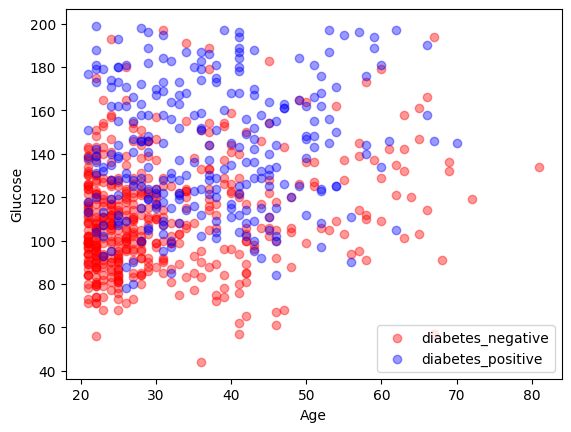

In [ ]:
plt.scatter(diabetes_negative.Age, diabetes_negative.Glucose, color="red", label="diabetes_negative",alpha=0.4)
plt.scatter(diabetes_positive.Age, diabetes_positive.Glucose, color="blue",label="diabetes_positive",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#Correlation Heatmap



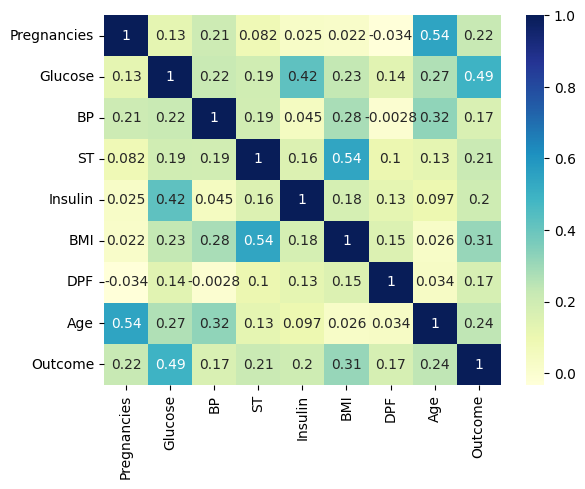

In [ ]:

dataplot = sns.heatmap(df_new.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
df_new.corr()['Outcome'].sort_values(ascending=True)

,Outcome
BP,0.166074
DPF,0.173844
Insulin,0.203790
ST,0.214873
Pregnancies,0.221898
Age,0.238356
BMI,0.312038
Glucose,0.492928
Outcome,1.000000


<Axes: title={'center': 'Number of Diabetic and Non-Diabetic persons'}, xlabel='Outcome'>

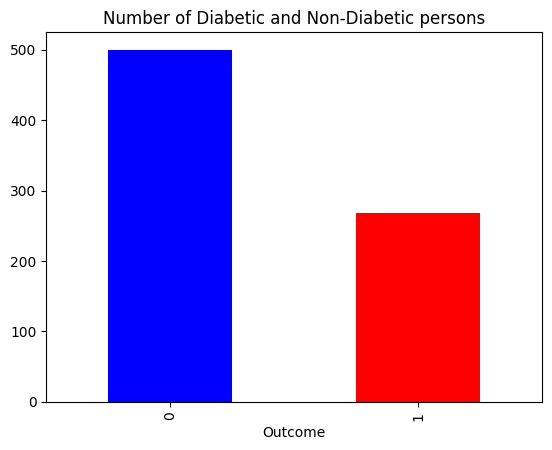

In [ ]:
df_new['Outcome'].value_counts().plot(kind='bar',title='Number of Diabetic and Non-Diabetic persons', color=['blue','red'])

#Scatter Plot between BMI vs Glucose

<Axes: title={'center': 'BMI vs Glucose'}, xlabel='BMI', ylabel='Glucose'>

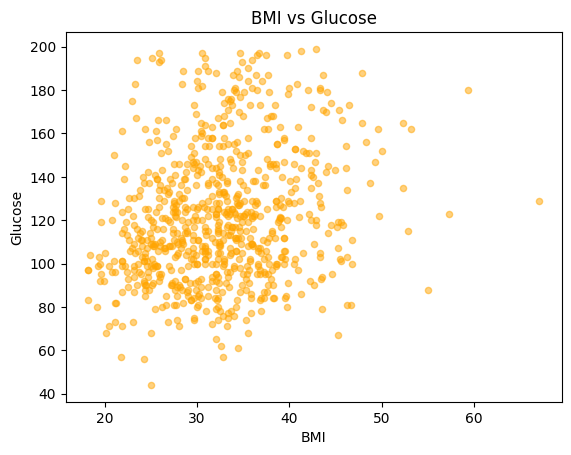

In [ ]:
df_new.plot(kind='scatter',x='BMI', y='Glucose',title='BMI vs Glucose', color='orange',alpha = 0.5)

#Scatter Plot between Age vs Glucose

<Axes: title={'center': 'Age vs Glucose'}, xlabel='Age', ylabel='Glucose'>

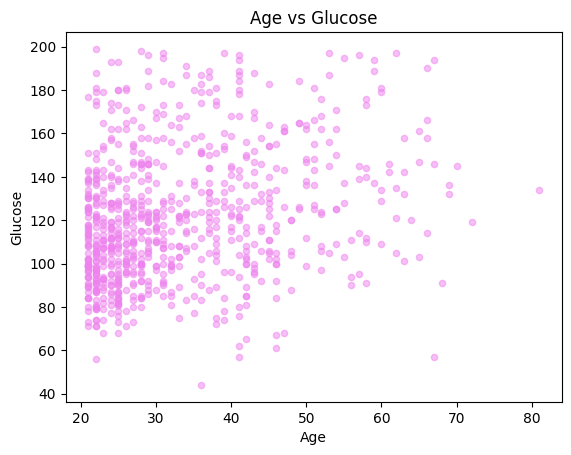

In [ ]:
df_new.plot(kind='scatter',x='Age', y='Glucose',title='Age vs Glucose', color='violet',alpha = 0.5)

#Highest Age of Diabetic patients

<Axes: title={'center': 'Age Distribution of diabetic patients'}, ylabel='Frequency'>

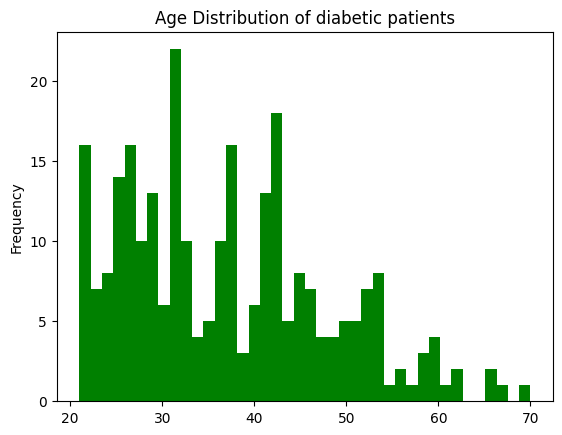

In [ ]:
df_new[df_new['Outcome']==1]['Age'].plot(kind='hist',bins=40,title='Age Distribution of diabetic patients',color='green')

#Highest Age is in the range 30 and 40.

#Data Modeling

In [ ]:



X = df_new.drop(['Outcome'],axis=1)
y = df_new.Outcome.values

print(X.head())
print(y[0:5])


   Pregnancies  Glucose    BP    ST  Insulin   BMI    DPF  Age
0            6    148.0  72.0  35.0    125.0  33.6  0.627   50
1            1     85.0  66.0  29.0    125.0  26.6  0.351   31
2            8    183.0  64.0  29.0    125.0  23.3  0.672   32
3            1     89.0  66.0  23.0     94.0  28.1  0.167   21
4            0    137.0  40.0  35.0    168.0  43.1  2.288   33
[1 0 1 0 1]


#Data Normalization

In [ ]:

'''
X_normalized = (X-np.min(X))/(np.max(X)-np.min(X))
print("the data after normalization: ")
print(X_normalized.head())
'''

'\nX_normalized = (X-np.min(X))/(np.max(X)-np.min(X))\nprint("the data after normalization: ")\nprint(X_normalized.head())\n'

#Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)



In [ ]:
from pycaret.classification import *

diab = setup(data = df_new,target = 'Outcome',normalize=True, session_id=1)

,Description,Value
0,Session id,1
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7804,0.8466,0.6164,0.7136,0.6573,0.4984,0.5039,0.1980
lr,Logistic Regression,0.7766,0.8509,0.5895,0.7176,0.6423,0.4839,0.4921,0.5780
rf,Random Forest Classifier,0.7748,0.8328,0.6170,0.6990,0.6492,0.4867,0.4924,0.4370
ridge,Ridge Classifier,0.7730,0.8503,0.5737,0.7152,0.6308,0.4721,0.4813,0.0670
lda,Linear Discriminant Analysis,0.7693,0.8506,0.5737,0.7076,0.6268,0.4650,0.4743,0.0360
nb,Naive Bayes,0.7617,0.8205,0.6146,0.6755,0.6411,0.4637,0.4666,0.0360
ada,Ada Boost Classifier,0.7616,0.8281,0.6202,0.6718,0.6421,0.4645,0.4674,0.1340
gbc,Gradient Boosting Classifier,0.7506,0.8285,0.6056,0.6526,0.6258,0.4400,0.4424,0.1810
xgboost,Extreme Gradient Boosting,0.7450,0.8022,0.6058,0.6473,0.6189,0.4294,0.4348,0.1000
lightgbm,Light Gradient Boosting Machine,0.7431,0.8074,0.5947,0.6498,0.6156,0.4246,0.4292,0.3200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7619,0.8148,0.5679,0.6970,0.6259,0.4539,0.4590


In [ ]:

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_features=8, random_state=0)
#n=1
#for i in range(900,3000,100):

clf = ExtraTreesClassifier(n_estimators=900,criterion='gini',
                                max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='sqrt', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, bootstrap=False,
                                oob_score=False, n_jobs=None, random_state=None,
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
                                max_samples=None, monotonic_cst=None)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

#print(n, "Score: %",clf.score(X_test,y_test)*100)
 #    n +=1


0.7705627705627706


In [ ]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction_1 = lr.predict(X_test)
print(prediction_1)
print(lr.score(X_test,y_test))


[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 0]
0.7662337662337663


In [ ]:

from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(X_train, y_train)
prediction_2 = classifier.predict(X_test)
print(prediction_2)
print(classifier.score(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, prediction_2))
print(classification_report(y_test, prediction_2))


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1]
0.7792207792207793
[[138  19]
 [ 32  42]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.69      0.57      0.62        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



In [ ]:

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)
print(xgb_prediction)
print(xgb_model.score(X_test, y_test))
print(confusion_matrix(y_test, xgb_prediction))
print(classification_report(y_test, xgb_prediction))


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 1]
0.7705627705627706
[[131  26]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       157
           1       0.64      0.64      0.64        74

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
print(svc_prediction)
print(svc_model.score(X_test, y_test))
print(confusion_matrix(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0]
0.7489177489177489
[[142  15]
 [ 43  31]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.67      0.42      0.52        74

    accuracy                           0.75       231
   macro avg       0.72      0.66      0.67       231
weighted avg       0.74      0.75      0.73       231



In [ ]:

from sklearn.naive_bayes import GaussianNB
naives_model = GaussianNB()
naives_model.fit(X_train, y_train)
naives_prediction = naives_model.predict(X_test)

print(naives_prediction)
print(naives_model.score(X_test, y_test))
print(confusion_matrix(y_test, naives_prediction))
print(classification_report(y_test, naives_prediction))


[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0]
0.7619047619047619
[[137  20]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.53      0.59        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.7142857142857143


In [ ]:
n = 1
for k in range(1,11):
  n_knn = KNeighborsClassifier(n_neighbors=k)
  n_knn.fit(X_train, y_train)
  print(n, "Score: %",n_knn.score(X_test,y_test)*100)
  n += 1



1 Score: % 64.93506493506493
2 Score: % 69.6969696969697
3 Score: % 71.42857142857143
4 Score: % 72.2943722943723
5 Score: % 72.2943722943723
6 Score: % 70.56277056277057
7 Score: % 72.72727272727273
8 Score: % 74.89177489177489
9 Score: % 75.75757575757575
10 Score: % 76.19047619047619


In [ ]:
#Model After tuning
knn_tune = KNeighborsClassifier(n_neighbors=10)
knn_tune.fit(X_train, y_train)
knn_tune.predict(X_test)
print(knn_tune.score(X_test,y_test))


0.7619047619047619
